In [1]:
 # 과제
# 2차방정식 풀이 해보기
# 현재까지 만들어진 소스를 가지고
# 2차방정식을 풀어본다
# 2차 방정식 artificial 샘플을 만들고
# 2차 방정식을 위한 model (kernel 생성,  weight 크기 수정)

In [2]:
import torch

a = torch.tensor([1,2,3])
a[[0, 1]]

tensor([1, 2])

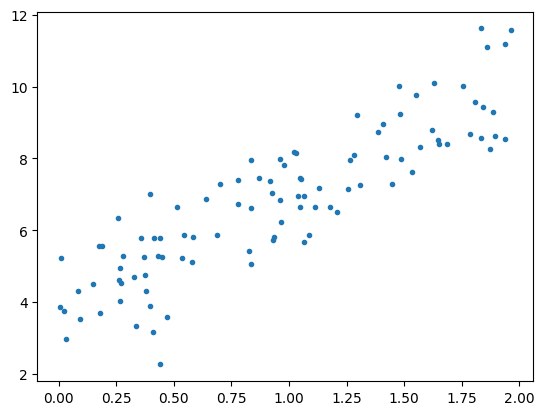

In [6]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
x = torch.rand(m, 1) * 2
y = x * 3 + 4 + torch.randn(m, 1)

plt.plot(x, y, '.')

In [9]:
dataset = list(zip(x, y))

loader = torch.utils.data.DataLoader(dataset, batch_size = 20, shuffle = True)

for xi , yi in loader: # DataLoader에서 첫 번째 배치 하나만 꺼내서 확인
    break

xi.shape, yi.shape, xi.dtype, yi.dtype

(torch.Size([20, 1]), torch.Size([20, 1]), torch.float32, torch.float32)

In [ ]:
torch.linalg.pinv(torch.cat([x, x**0], axis = 1)) @ y

# [[1],
# [2],
# [3]]
# -> 
# [[1, 1],
# [2, 1],
# [3, 1]]

# shape = (100, 2)
# a(기울기) / b(절편)을 구한거임

tensor([[3.1204],
        [3.8531]])

In [14]:
W1 = torch.randn((1, 5), requires_grad= True) # 이 파라미터는 학습 대상이다.
B1 = torch.randn((5,), requires_grad= True)
W2 = torch.randn((5, 1), requires_grad= True)
B2 = torch.randn((1,), requires_grad= True)

# x.shape = (batch_size, 1)
# (batch, 1) @ (1, 5)
#  = (batch, 5)

# (batch, 5) @ (5, 1)
#  = (batch, 1)

def model(x):
    h = torch.relu(x @ W1 + B1)
    y = (h @ W2 + B2)
    return y

# optimizer(최적화)
opt = torch.optim.Adam([W1, B1, W2, B2], lr=0.0001)

loss_fn = torch.nn.MSELoss()

In [ ]:
# grad

# 100개 데이터
# 20개씩 나눔
# 한 epoch당 5번 update 발생

# pred = model(bx)
# W1, B1, W2, B2로 예측값 계산

for epoch in range(5000):
    for bx, by in loader:
        # 현재 파라미터를 이용해서 예측값을 구하고 f(x) = ax+b
        pred = model(bx)

        # 에러를 구하고
        loss = loss_fn(pred, by)
        
        opt.zero_grad()
        loss.backward()
        
        # update
        opt.step()
    print(epoch, loss)         
        

0 tensor(58.0451, grad_fn=<MseLossBackward0>)
1 tensor(56.6989, grad_fn=<MseLossBackward0>)
2 tensor(57.4110, grad_fn=<MseLossBackward0>)
3 tensor(60.2602, grad_fn=<MseLossBackward0>)
4 tensor(54.7779, grad_fn=<MseLossBackward0>)
5 tensor(49.6879, grad_fn=<MseLossBackward0>)
6 tensor(62.4001, grad_fn=<MseLossBackward0>)
7 tensor(55.0845, grad_fn=<MseLossBackward0>)
8 tensor(55.7350, grad_fn=<MseLossBackward0>)
9 tensor(60.4031, grad_fn=<MseLossBackward0>)
10 tensor(69.1180, grad_fn=<MseLossBackward0>)
11 tensor(61.5557, grad_fn=<MseLossBackward0>)
12 tensor(57.5674, grad_fn=<MseLossBackward0>)
13 tensor(57.3365, grad_fn=<MseLossBackward0>)
14 tensor(54.4413, grad_fn=<MseLossBackward0>)
15 tensor(53.1410, grad_fn=<MseLossBackward0>)
16 tensor(66.7238, grad_fn=<MseLossBackward0>)
17 tensor(56.4273, grad_fn=<MseLossBackward0>)
18 tensor(70.5769, grad_fn=<MseLossBackward0>)
19 tensor(56.1342, grad_fn=<MseLossBackward0>)
20 tensor(66.7662, grad_fn=<MseLossBackward0>)
21 tensor(55.2304, grad

23 tensor(58.8977, grad_fn=<MseLossBackward0>)

24 tensor(62.9800, grad_fn=<MseLossBackward0>)

-> 예측과 실제값 차이의 제곱 평균

숫자가 클수록 예측이 많이 틀린 것

In [16]:
print(W1, B1, W2, B2)

tensor([[-0.0552, -0.5156,  1.0973, -0.2985,  1.7396]], requires_grad=True) tensor([-2.3135e-01,  1.4856e+00,  1.0423e+00,  1.3877e-03,  1.0483e-01],
       requires_grad=True) tensor([[-0.6460],
        [ 1.0507],
        [ 1.1866],
        [-0.1492],
        [ 1.3612]], requires_grad=True) tensor([0.9036], requires_grad=True)


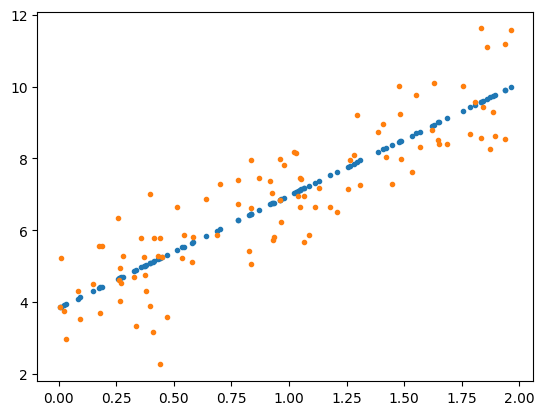

In [19]:
with torch.no_grad():
    pred = model(x)

plt.plot(x, pred, '.')

((pred-y) ** 2).mean()
plt.plot(x, y, '.')

# 과제
1. 2차방정식 풀이 해보기
2. 현재까지 만들어진 소스를 가지고
3. 2차방정식을 풀어본다
4. 2차 방정식 artificial 샘플을 만들고
5. 2차 방정식을 위한 model (kernel 생성,  weight 크기 수정)

y= 2X^2 + 3X + 5 + noise

In [ ]:
# 
import torch
import matplotlib.pyplot as plt

m = 200
x = torch.randn(m, 1) * 2
y = 2 * x**2 + 3*x + 5 + torch.randn(m, 1)

plt.plot(x, y, '.')

In [ ]:
X = torch.cat